# Midterm Review

In [6]:
from datascience import *
from cs104 import *
import numpy as np
%matplotlib inline

## Small Items

* You will not need to use the `interact` function or think about interactive visualizations on the exam.

## Loops

### An Example of a loop that iterates over the values of an array

In [7]:
# stay_positive(make_array(1,-1,-2,3,4,0)) function should return 3 -> number of positive numbers in an array.
extra_values = make_array(-1,2,3)

def stay_positive(values):
    numbers_positive = 0   # keep a count of how my positive numbers we've seen so far
    
    for value in values:
        # if my value is positive, increase number of positive numbers
        if value > 0: 
            numbers_positive = numbers_positive + 1
            
    return numbers_positive
            

In [12]:
stay_positive(make_array(1,-1,-2,3,4,0))

3

### An Example to builds an array and returns it

In [15]:
def track_positives(values):
    positive_values = make_array()
    for value in values:
        # if my value is positive, increase number of positive numbers
        if value > 0: 
            positive_values = np.append(positive_values, value)
    return positive_values

In [16]:
track_positives(make_array(1,-1,-2,3,4,0))

array([1., 3., 4.])

### An Example of a loop that iterates for a specific number of times.

In [17]:
def run_trials(trials):
    for i in np.arange(0,trials):
        print(2*i)

In [19]:
n_trials = 10     # how many trials to run
run_trials(n_trials)

0
2
4
6
8
10
12
14
16
18


## Group and Pivot

In [22]:
penguins = Table().read_table('data/penguins.csv')
penguins.sample(5)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
Adelie,Dream,32.1,15.5,188,3050,FEMALE
Gentoo,Biscoe,45.8,14.6,210,4200,FEMALE
Adelie,Biscoe,38.2,20,190,3900,MALE
Gentoo,Biscoe,48.4,16.3,220,5400,MALE
Gentoo,Biscoe,48.5,15,219,4850,FEMALE


`group` divides the rows into groups according to the values stored in a categorical variable.

In [27]:
penguins.group('species')

species,count
Adelie,151
Chinstrap,68
Gentoo,123


With only one parameter, we get a count of how many rows are in each group.  Pass in a second parameter that is an aggregation function to summarize the numerical columns in the table.

In [29]:
penguins.group('species', np.mean)

species,island mean,bill_length_mm mean,bill_depth_mm mean,flipper_length_mm mean,body_mass_g mean,sex mean
Adelie,,38.7914,18.3464,189.954,3700.66,
Chinstrap,,48.8338,18.4206,195.824,3733.09,
Gentoo,,47.5049,14.9821,217.187,5076.02,


We can also group by more than one column by passing in an array of the columns to group by.

In [30]:
penguins.group(make_array('species', 'island'), max)

species,island,bill_length_mm max,bill_depth_mm max,flipper_length_mm max,body_mass_g max,sex max
Adelie,Biscoe,45.6,21.1,203,4775,MALE
Adelie,Dream,44.1,21.2,208,4650,UNKNOWN
Adelie,Torgersen,46,21.5,210,4700,UNKNOWN
Chinstrap,Dream,58,20.8,212,4800,MALE
Gentoo,Biscoe,59.6,17.3,231,6300,UNKNOWN


`pivot` creates a 2-dimensional matrix by grouping according to two columns.  If only those columns are provided, we get counts of how many rows fall into each row/col combination.

In [32]:
penguins.pivot('species', 'island')

island,Adelie,Chinstrap,Gentoo
Biscoe,44,0,123
Dream,56,68,0
Torgersen,51,0,0


Or you can pass a third column and a way to summarize that column's values for each group:

In [33]:
penguins.pivot('species', 'island', 'bill_length_mm', max)

island,Adelie,Chinstrap,Gentoo
Biscoe,45.6,0,59.6
Dream,44.1,58,0
Torgersen,46,0,0


We use pivot instead of group to present data in a more accessible way, or to prepare for additional data manipulation or analyses.

## Functions

Check out our lecture slides on [Functions](https://docs.google.com/presentation/d/1zX8EGJuJM0uy057J7q5DaR8we6TKFktLzI-25fSFtWk/edit?slide=id.g15a787143fd_0_3#slide=id.g15a787143fd_0_3) for a more complete discussion of how function definitions work, but here's an example showing the major parts:
1. All functions start with def, the number of the function, and then the list of parameter names.
2. The body of the function is indented and contains the instructions to run when the function is called.
3. The `return` statement is used to give a value back to the caller.

In [37]:
def count_odd_values(values):
    num_odd_values = 0
    for value in values:
        if value % 2 != 0:
            num_odd_values = num_odd_values + 1
    return num_odd_values

In [38]:
count_odd_values(extra_values)

2

## Histograms

Histograms show the distribution of values taken on by a variable.  They often convey more information than just looking at the min, max, and mean.
The area of each bar is proportional to the percent of data values falling with them.  That percentage is computed for a bar by multiplying the width of the bar by its height.

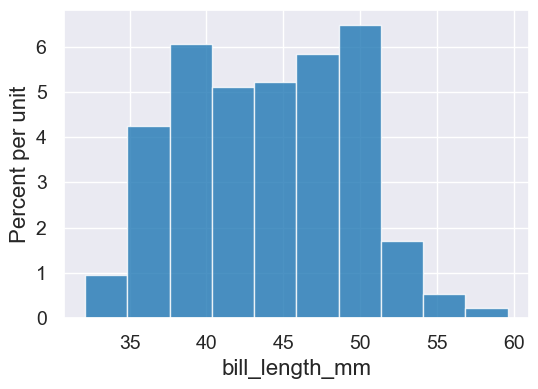

In [45]:
penguins.hist('bill_length_mm')

We can adjust the bins to make the plot easier to interpret.  One way is to give an array of values that will be used as the cutoffs between the bins:

In [48]:
cutoffs = np.arange(30,65,5)
cutoffs

array([30, 35, 40, 45, 50, 55, 60])

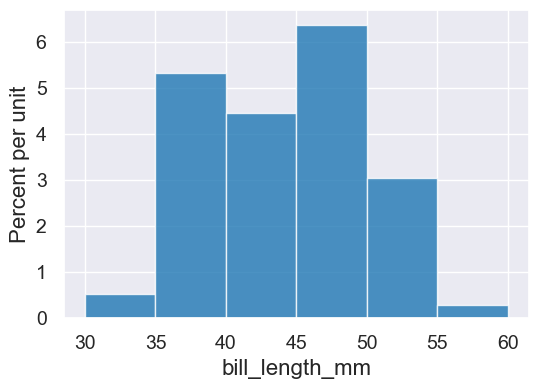

In [49]:
penguins.hist('bill_length_mm', bins=cutoffs)

We can also make an overlaid histogram:

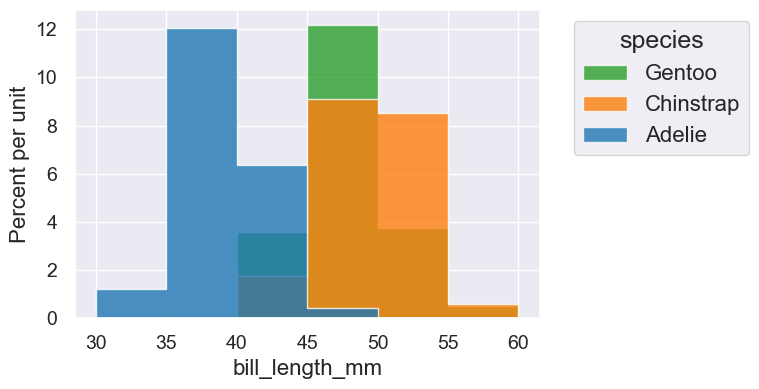

In [50]:
penguins.hist('bill_length_mm', bins=cutoffs, group='species')